In [2]:

# Importamos modulos 

import pandas as pd
import seaborn as sns
import numpy as np


In [3]:
# Cargamos dataset

titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
titanic.isna().sum()
titanic.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

# Preguntas que queremos responder

Pensar dos caracteristicas que podrian influir en la chance de sobrevivir.

In [5]:
# Edad
# Categoria de pasaje
# Sexo

<AxesSubplot:xlabel='survived', ylabel='age'>

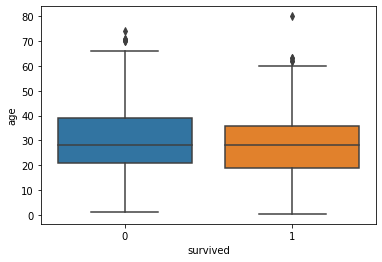

In [10]:
# Pregunta 1: Edad:

sns.boxplot(data=titanic, x="survived", y="age")

In [7]:
# Pregunta 2: Sexo

# No podemos hacer el mismo grafico. Pensemos que necesitamos. Pasar a pizarra.

In [8]:
# como hacerlo manualmente:
sexo = "male"
sobrevivio = 0
data = titanic[(titanic["survived"]==sobrevivio) & (titanic["sex"] == sexo)]
display (data.head()) # Notar los indices para ver que faltan entradas del original.
indicesSM = data.index
display (indicesSM)
display (len(indicesSM)) # Este es el numero que nos interesa.
print (f'En el grupo correspondiente a sexo: {sexo} y variable sobrevivio: {sobrevivio} hay {len(indicesSM)} elementos')



,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False


Int64Index([  0,   4,   5,   6,   7,  12,  13,  16,  20,  26,
            ...
            872, 873, 876, 877, 878, 881, 883, 884, 886, 890],
           dtype='int64', length=468)

468

En el grupo correspondiente a sexo: male y variable sobrevivio: 0 hay 468 elementos


In [9]:
# Hay que repetirlo a mano para cada combinacion!
for sexo in titanic["sex"].unique():
  for sobrevivio in titanic["survived"].unique():
    cantidad = len(titanic[(titanic["survived"]==sobrevivio) & (titanic["sex"] == sexo)].index)
    print (f'En el grupo correspondiente a sexo: {sexo} y variable sobrevivio: {sobrevivio} hay {cantidad} elementos')


En el grupo correspondiente a sexo: male y variable sobrevivio: 0 hay 468 elementos
En el grupo correspondiente a sexo: male y variable sobrevivio: 1 hay 109 elementos
En el grupo correspondiente a sexo: female y variable sobrevivio: 0 hay 81 elementos
En el grupo correspondiente a sexo: female y variable sobrevivio: 1 hay 233 elementos


In [10]:
# Obvio que alguien ya penso en esto!

datos_agrupados = titanic.groupby(["sex","survived"])
display (datos_agrupados.groups)
display (datos_agrupados.groups[('male',0)])

{('female', 0): [14, 18, 24, 38, 40, 41, 49, 71, 100, 111, 113, 114, 119, 132, 140, 147, 167, 177, 180, 199, 205, 229, 235, 240, 246, 251, 254, 264, 276, 293, 297, 312, 357, 362, 374, 396, 402, 404, 409, 415, 419, 423, 436, 474, 485, 498, 501, 502, 503, 534, 541, 542, 564, 567, 578, 593, 610, 617, 634, 638, 642, 654, 657, 678, 680, 702, 729, 736, 767, 772, 792, 799, 807, 813, 816, 852, 854, 863, 882, 885, 888], ('female', 1): [1, 2, 3, 8, 9, 10, 11, 15, 19, 22, 25, 28, 31, 32, 39, 43, 44, 47, 52, 53, 56, 58, 61, 66, 68, 79, 82, 84, 85, 88, 98, 106, 109, 123, 128, 133, 136, 141, 142, 151, 156, 161, 166, 172, 184, 186, 190, 192, 194, 195, 198, 208, 211, 215, 216, 218, 230, 233, 237, 241, 247, 255, 256, 257, 258, 259, 268, 269, 272, 274, 275, 279, 289, 290, 291, 299, 300, 303, 306, 307, 309, 310, 311, 315, 316, 318, 319, 322, 323, 325, 327, 328, 329, 330, 334, 337, 341, 345, 346, 347, ...], ('male', 0): [0, 4, 5, 6, 7, 12, 13, 16, 20, 26, 27, 29, 30, 33, 34, 35, 37, 42, 45, 46, 48, 50, 51

Int64Index([  0,   4,   5,   6,   7,  12,  13,  16,  20,  26,
            ...
            872, 873, 876, 877, 878, 881, 883, 884, 886, 890],
           dtype='int64', length=468)

In [11]:
# Que quiero hacer ahora con los grupos? Puedo aplicar operaciones que sean de agregacion

datos_agrupados.count() # Ojo con los nans!
datos_agrupados.mean()
#datos_agrupados


pclass        age     sibsp     parch       fare  \
sex    survived                                                       
female 0         2.851852  25.046875  1.209877  1.037037  23.024385   
       1         1.918455  28.847716  0.515021  0.515021  51.938573   
male   0         2.476496  31.618056  0.440171  0.207265  21.960993   
       1         2.018349  27.276022  0.385321  0.357798  40.821484   

                 adult_male     alone  
sex    survived                        
female 0           0.000000  0.333333  
       1           0.000000  0.424893  
male   0           0.959402  0.741453  
       1           0.807339  0.587156

age      pclass     
sex      female male female male
survived                        
0            64  360     81  468
1           197   93    233  109

<AxesSubplot:xlabel='sex', ylabel='survived'>

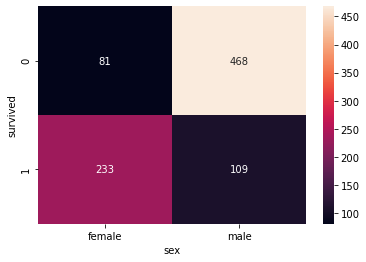

In [12]:
# Como hacemos para verlo en modo tabla de doble entrada?

datos = datos_agrupados.count()
datos
datos.reset_index()
datos.reset_index().pivot("sex","survived",["pclass"]) # Aca primer y segundo argumento es categorias de doble entrada, tercero contenido

# O directamente:

titanic.pivot_table("age","survived","sex") # Aca el orden de los argumentos cambia! Y por default hace promedio
display (titanic.pivot_table(["pclass","age"],"survived","sex", aggfunc="count"))


# Y ahora lo graficamos!
sns.heatmap(titanic.pivot_table("pclass","survived","sex", aggfunc="count"), annot=True, fmt='g')

In [13]:
datos_agrupados.mean()

pclass        age     sibsp     parch       fare  \
sex    survived                                                       
female 0         2.851852  25.046875  1.209877  1.037037  23.024385   
       1         1.918455  28.847716  0.515021  0.515021  51.938573   
male   0         2.476496  31.618056  0.440171  0.207265  21.960993   
       1         2.018349  27.276022  0.385321  0.357798  40.821484   

                 adult_male     alone  
sex    survived                        
female 0           0.000000  0.333333  
       1           0.000000  0.424893  
male   0           0.959402  0.741453  
       1           0.807339  0.587156

# Fin de la intro conceptual

# Inicio de extras

## Extras de groupby

In [14]:
# Obviamente se puede agrupar con una sola columna como etiqueta
# Por ejemplo queremos saber el precio promedio de cada categoria
titanic.groupby("pclass")["fare"].mean()

pclass
1    84.154687
2    20.662183
3    13.675550
Name: fare, dtype: float64

In [15]:
# Podemos calcular porcentajes del total de una variable separando por otra variable
# Podemos por ejemplo calcular que porcentaje de la plata recaudada provino de los pasajes de cada categoria.
titanic["unos"] = 1
titanic.groupby("pclass")["fare","unos"].sum()/titanic[["fare","unos"]].sum()*100

<ipython-input-15-05290b7f053b>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  titanic.groupby("pclass")["fare","unos"].sum()/titanic[["fare","unos"]].sum()*100


,fare,unos
pclass,,
1,63.349288,24.242424
2,13.249629,20.650954
3,23.401084,55.106622


In [16]:
# Que pasa con los nans? No los agrupa!
# Veamos que pasa si agrupamos por deck:
titanic.groupby("deck").size() #size() indica el tamaño de cada grupo
# Ver como reemplazar los nans!
titanic["deck"] = titanic["deck"].cat.add_categories("Sin Datos")
titanic["deck"]
titanic["deck"] = titanic["deck"].fillna("Sin Datos")
titanic.groupby("deck").size() #size() indica el tamaño de cada grupo

ValueError: Cannot setitem on a Categorical with a new category, set the categories first

In [ ]:
# Podemos armarnos un dict para agrupamientos mas arbitrarios
# Queremos separar entre los que embarcaron por decks A,C,E,G como puertas pares y los que lo hicieron por B,D,F como impares

tipo_puerta = {
    "A":"Puerta Par",
    "B":"Puerta Impar",
    "C":"Puerta Par",
    "D":"Puerta Impar",
    "E":"Puerta Par",
    "F":"Puerta Impar",
    "G":"Puerta Par"
}
# Para eso primero tenemos que elegir el index porque el dict busca en el indice
titanic.index = titanic["deck"]
titanic.groupby(tipo_puerta).size()
titanic = titanic.reset_index(drop=True)

Series([], dtype: int64)

In [ ]:
# Podemos hacer un funcion que devuelva el grupo
# Por ejemplo queremos distinguir la puerta A de la B del resto.
def micriterio (puerta):
  tipo_puerta = {
    "A":"Puerta A",
    "B":"Puerta B",
    "Sin Datos":"Sin Datos"
  }
  if puerta in tipo_puerta:
    result = tipo_puerta[puerta]
  else:
    result = "Otra puerta"
  return result

titanic.index = titanic["deck"]
display (titanic.head())
titanic.groupby(micriterio,axis=0).size()
#titanic = titanic.reset_index(drop=True)
#display (titanic.head())

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
deck,,,,,,,,,,,,,,,
Sin Datos,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Sin Datos,Southampton,no,False
C,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
Sin Datos,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Sin Datos,Southampton,yes,True
C,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
Sin Datos,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Sin Datos,Southampton,no,True


Otra puerta    141
Puerta A        15
Puerta B        47
Sin Datos      688
dtype: int64

In [ ]:
# Podemos elegir mas de un criterio de agregacion
# Por ejemplo queremos promedio, minimo y maximo de fare y age para cada categoria de pasaje y sexo
titanic.groupby(["pclass","sex"])[["age","fare"]].aggregate(['min', np.median, max])


age                  fare                    
                min median   max      min    median       max
pclass sex                                                   
1      female  2.00   35.0  63.0  25.9292  82.66455  512.3292
       male    0.92   40.0  80.0   0.0000  41.26250  512.3292
2      female  2.00   28.0  57.0  10.5000  22.00000   65.0000
       male    0.67   30.0  70.0   0.0000  13.00000   73.5000
3      female  0.75   21.5  63.0   6.7500  12.47500   69.5500
       male    0.42   25.0  74.0   0.0000   7.92500   69.5500

In [ ]:
# Y podemos aplicar diferentes agregaciones a diferentes columnas usando un dict
titanic.groupby(["pclass","sex"])[["age","fare"]].aggregate({'age': 'mean', 'fare': 'max'}) # Ojo que aca no muestra que calcula!


age      fare
pclass sex                        
1      female  34.611765  512.3292
       male    41.281386  512.3292
2      female  28.722973   65.0000
       male    30.740707   73.5000
3      female  21.750000   69.5500
       male    26.507589   69.5500

In [ ]:
# Podemos hacer transformaciones en un grupo considerando propiedades del grupo.
# Vamos a transformar la edad de los hombre y mujeres por la edad promedio de los hombres y mujeres y lo guardamos como columna nueva.
titanic["edad_media_por_genero"] = titanic.groupby("sex")["age"].transform(lambda grp: grp.mean())
# O podemos reemplazar en cada grupo por el primer valor que encuentre en el grupo
titanic["edad_primera_encontrada"] = titanic.groupby("sex")["age"].transform(lambda grp: grp.iloc[0])
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,edad_media_por_genero,edad_primera_encontrada
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,30.726645,22.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,27.915709,38.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,27.915709,38.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,27.915709,38.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,30.726645,22.0


In [ ]:
# Podemos filtrar grupos segun un griterio de los grupos como un todo.
# Vamos a agrupar por categoria de pasaje y sexo y vamos a quedarnos con los grupos cuya edad promedio sea menor a 30 años
titanic.groupby(["sex","pclass"]).filter(lambda grp: grp['age'].mean() < 30).head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
deck,,,,,,,,,,,,,,,
Sin Datos,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Sin Datos,Southampton,no,False
Sin Datos,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Sin Datos,Southampton,yes,True
Sin Datos,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Sin Datos,Southampton,no,True
Sin Datos,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,Sin Datos,Queenstown,no,True
Sin Datos,0,3,male,2.0,3,1,21.0750,S,Third,child,False,Sin Datos,Southampton,no,False
Sin Datos,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,Sin Datos,Southampton,yes,False
Sin Datos,1,2,female,14.0,1,0,30.0708,C,Second,child,False,Sin Datos,Cherbourg,yes,False
G,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
Sin Datos,0,3,male,20.0,0,0,8.0500,S,Third,man,True,Sin Datos,Southampton,no,True


In [ ]:
# Obviamente podemos hacer un apply como si cada grupo fuera un dataframe
# Por ejemplo queremos describir la tabla separando en generos
titanic.groupby("sex").apply(lambda grp: grp.describe())

survived  ...  edad_primera_encontrada
sex                       ...                         
female count  314.000000  ...                    314.0
       mean     0.742038  ...                     38.0
       std      0.438211  ...                      0.0
       min      0.000000  ...                     38.0
       25%      0.000000  ...                     38.0
       50%      1.000000  ...                     38.0
       75%      1.000000  ...                     38.0
       max      1.000000  ...                     38.0
male   count  577.000000  ...                    577.0
       mean     0.188908  ...                     22.0
       std      0.391775  ...                      0.0
       min      0.000000  ...                     22.0
       25%      0.000000  ...                     22.0
       50%      0.000000  ...                     22.0
       75%      0.000000  ...                     22.0
       max      1.000000  ...                     22.0

[16 rows x 8 columns]

## Extras de pivot

In [ ]:
# Podemos segmentar dentro de una misma categoria
# Por ejemplo queremos ver cuatos pasajes hay que pagaron diferente a lo esperado para cada categoria.

# Primero queremos tener un buen criterio de separacion de bins
display (titanic.groupby(["pclass"])["fare"].mean())
bins = [0,17,30,titanic["fare"].max()]
#display (pd.cut(titanic["fare"],bins))
titanic.pivot_table(["age","sex"],"pclass",pd.cut(titanic["fare"],bins), aggfunc="count") # usamos who porque no tiene nans, es lo mismo cual usamos mientras solo contemos items

pclass
1    84.154687
2    20.662183
3    13.675550
Name: fare, dtype: float64

age                                      sex               \
fare   (0.0, 17.0] (17.0, 30.0] (30.0, 512.329] (0.0, 17.0] (17.0, 30.0]   
pclass                                                                     
1                1           33             149           1           41   
2               89           61              23          93           61   
3              277           43              31         387           59   

                        
fare   (30.0, 512.329]  
pclass                  
1                  169  
2                   24  
3                   41

In [20]:
# Podemos segmentar dentro de una misma categoria
# O podemos ver como se dividen en cuartiles los precios segun categoria haciendo el conteo de cada cuartil separando por edad y sexo

age_categories = pd.cut(titanic.age, [0, 18, 80])
fare_categories = pd.qcut(titanic.fare, 5)
fare_categories
titanic.pivot_table('survived', ['sex', age_categories], [fare_categories, 'class'],aggfunc="count")


fare            (-0.001, 7.854]              (7.854, 10.5]               \
class                     First Second Third         First Second Third   
sex    age                                                                
female (0, 18]                0      0     8             0      1     5   
       (18, 80]               0      0    13             0      7    17   
male   (0, 18]                0      0    10             0      1    10   
       (18, 80]               4      0    82             0     15    90   

fare            (10.5, 21.679]              (21.679, 39.688]               \
class                    First Second Third            First Second Third   
sex    age                                                                  
female (0, 18]               0      3    19                1      9    10   
       (18, 80]              0     26    20                9     24     8   
male   (0, 18]               0      6    12                0      7    15   
       (18, 80]              0     41    20               40     23     6   

fare            (39.688, 512.329]               
class                       First Second Third  
sex    age                                      
female (0, 18]                 10      1     1  
       (18, 80]                65      3     1  
male   (0, 18]                  5      1     4  
       (18, 80]                52      5     4

# Merge

In [21]:
# cargamos el dataser de arbolado y el de comunas

arboles = pd.read_csv("https://cdn.buenosaires.gob.ar/datosabiertos/datasets/arbolado-publico-lineal/arbolado-publico-lineal-2017-2018.csv")
arboles.head()


comunas = pd.read_csv("https://cdn.buenosaires.gob.ar/datosabiertos/datasets/comunas/comunas.csv")
comunas.head()

C:\Users\Ionatan\.conda\envs\DH\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,WKT,ID,OBJETO,COMUNAS,BARRIOS,PERIMETRO,AREA
0,MULTIPOLYGON (((-58.3800038855693 -34.57002352...,1,LIMITE COMUNAL,2.0,RECOLETA,21452.838648,6.317265e+06
1,MULTIPOLYGON (((-58.4306058283309 -34.60704708...,3,LIMITE COMUNAL,6.0,CABALLITO,10990.964471,6.851029e+06
2,MULTIPOLYGON (((-58.4883373673246 -34.62016035...,6,LIMITE COMUNAL,10.0,FLORESTA - MONTE CASTRO - VELEZ SARSFIELD - VE...,18332.037457,1.265656e+07
3,MULTIPOLYGON (((-58.498384839883 -34.596367656...,7,LIMITE COMUNAL,11.0,VILLA DEL PARQUE - VILLA DEVOTO - VILLA GRAL....,19987.696155,1.412004e+07
4,MULTIPOLYGON (((-58.5033113250844 -34.59385615...,8,LIMITE COMUNAL,12.0,COGHLAN - SAAVEDRA - VILLA PUEYRREDON - VILLA ...,17232.189372,1.557093e+07


In [45]:
# Vamos a trabajar con una version reducida del dataset de arbolado

arbolado = arboles.sample(10)
arbolado.head()

,long,lat,nro_registro,tipo_activ,comuna,manzana,calle_nombre,calle_altura,calle_chapa,direccion_normalizada,ubicacion,nombre_cientifico,ancho_acera,estado_plantera,ubicacion_plantera,nivel_plantera,diametro_altura_pecho,altura_arbol
208493,-58.482263,-34.613323,184287,Lineal,11,NaN,Camarones,3000.0,3026.0,CAMARONES 3026,Exacta,Ligustrum lucidum,4.4,Ocupada,Regular,A nivel,13.0,4.0
157530,-58.474981,-34.643384,286329,Lineal,9,1013,Laguna,900.0,990,LAGUNA 990,Exacta,Ligustrum ovalifolium,3.2,Ocupada,Regular,A nivel,27.0,6.0
155461,-58.487592,-34.653126,280287,Lineal,9,830,Garzón Eugenio Gral. Av.,5000.0,5088,"GARZON, EUGENIO, GRAL. AV. 5088",LA,Ficus elastica,6,Ocupada,Regular,A nivel,NaN,12.0
275365,-58.471513,-34.539281,83243,Lineal,13,NaN,Pico,2100,2111.0,PICO 2111,Exacta,Fraxinus pennsylvanica,4,Ocupada,Regular,A nivel,64.0,12.0
22258,-58.398626,-34.614351,30085,Lineal,3,NaN,Belgrano Av.,2200.0,2270.0,BELGRANO AV. 2270,Exacta,Fraxinus pennsylvanica,4,Ocupada,Regular,A nivel,30.0,9.0


In [46]:
comunas.rename(columns={"COMUNAS":"comuna"},inplace=True)
comunas.head()

,WKT,ID,OBJETO,comuna,BARRIOS,PERIMETRO,AREA
comuna,,,,,,,
2.0,MULTIPOLYGON (((-58.3800038855693 -34.57002352...,1,LIMITE COMUNAL,2.0,RECOLETA,21452.838648,6.317265e+06
6.0,MULTIPOLYGON (((-58.4306058283309 -34.60704708...,3,LIMITE COMUNAL,6.0,CABALLITO,10990.964471,6.851029e+06
10.0,MULTIPOLYGON (((-58.4883373673246 -34.62016035...,6,LIMITE COMUNAL,10.0,FLORESTA - MONTE CASTRO - VELEZ SARSFIELD - VE...,18332.037457,1.265656e+07
11.0,MULTIPOLYGON (((-58.498384839883 -34.596367656...,7,LIMITE COMUNAL,11.0,VILLA DEL PARQUE - VILLA DEVOTO - VILLA GRAL....,19987.696155,1.412004e+07
12.0,MULTIPOLYGON (((-58.5033113250844 -34.59385615...,8,LIMITE COMUNAL,12.0,COGHLAN - SAAVEDRA - VILLA PUEYRREDON - VILLA ...,17232.189372,1.557093e+07


In [57]:
# Vamos a agregar la informacion de poligonos a cada arbol segun que comuna esta: (no tiene mucho sentido hacerlo mas que como ejemplo)

arbolado_con_limites = pd.merge(arbolado, comunas,how="right", on="comuna")
arbolado_con_limites

,long,lat,nro_registro,tipo_activ,comuna,manzana,calle_nombre,calle_altura,calle_chapa,direccion_normalizada,...,ubicacion_plantera,nivel_plantera,diametro_altura_pecho,altura_arbol,WKT,ID,OBJETO,BARRIOS,PERIMETRO,AREA
0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,MULTIPOLYGON (((-58.3800038855693 -34.57002352...,1,LIMITE COMUNAL,RECOLETA,21452.838648,6.317265e+06
1,-58.449514,-34.616976,59178,Lineal,6.0,NaN,Paysandú,500.0,531.0,PAYSANDU 531,...,Regular,A nivel,59.0,12.0,MULTIPOLYGON (((-58.4306058283309 -34.60704708...,3,LIMITE COMUNAL,CABALLITO,10990.964471,6.851029e+06
2,-58.507636,-34.622362,538398,Lineal,10.0,210,Alcaráz,5050.0,5062.0,ALCARAZ 5062,...,Regular,A Nivel,26.0,11.0,MULTIPOLYGON (((-58.4883373673246 -34.62016035...,6,LIMITE COMUNAL,FLORESTA - MONTE CASTRO - VELEZ SARSFIELD - VE...,18332.037457,1.265656e+07
3,-58.482263,-34.613323,184287,Lineal,11.0,NaN,Camarones,3000.0,3026.0,CAMARONES 3026,...,Regular,A nivel,13.0,4.0,MULTIPOLYGON (((-58.498384839883 -34.596367656...,7,LIMITE COMUNAL,VILLA DEL PARQUE - VILLA DEVOTO - VILLA GRAL....,19987.696155,1.412004e+07
4,-58.508704,-34.599639,281350,Lineal,11.0,839b,González Joaquín V.,3800.0,3880.0,"GONZALEZ, JOAQUIN V. 3880",...,Ochava,A nivel,25.0,6.0,MULTIPOLYGON (((-58.498384839883 -34.596367656...,7,LIMITE COMUNAL,VILLA DEL PARQUE - VILLA DEVOTO - VILLA GRAL....,19987.696155,1.412004e+07
5,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,MULTIPOLYGON (((-58.5033113250844 -34.59385615...,8,LIMITE COMUNAL,COGHLAN - SAAVEDRA - VILLA PUEYRREDON - VILLA ...,17232.189372,1.557093e+07
6,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,MULTIPOLYGON (((-58.4267593172764 -34.55202337...,9,LIMITE COMUNAL,PALERMO,22126.531858,1.584587e+07
7,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,MULTIPOLYGON (((-58.4260240564076 -34.59661406...,11,LIMITE COMUNAL,AGRONOMIA - CHACARITA - PARQUE CHAS - PATERN...,17832.585580,1.432290e+07
8,-58.471513,-34.539281,83243,Lineal,13.0,NaN,Pico,2100,2111.0,PICO 2111,...,Regular,A nivel,64.0,12.0,MULTIPOLYGON (((-58.4403311131044 -34.54022434...,15,LIMITE COMUNAL,BELGRANO - COLEGIALES - NUÑEZ,26198.826953,1.471321e+07
9,-58.446083,-34.554696,102424,Lineal,13.0,NaN,Miñones,2100,2177.0,MIÑONES 2177,...,Regular,A nivel,26.0,10.0,MULTIPOLYGON (((-58.4403311131044 -34.54022434...,15,LIMITE COMUNAL,BELGRANO - COLEGIALES - NUÑEZ,26198.826953,1.471321e+07


In [55]:
# Queremos contar los arboles por comuna y agregar la informacion al dataset de las comunas

arboles_x_comuna = arbolado.groupby(["comuna"])['nro_registro'].count().rename("nro_arboles")
comunas.index = comunas['comuna']
comunas.join(arboles_x_comuna)
comunas.reset_index(drop=True, inplace=True)

In [60]:
# Un ejemplo de como usar filter

# Queremos quedarnos con los arboles cuyas especies tengan en promedio un diametro que supere un cierto umbral
display (arboles.head())


,long,lat,nro_registro,tipo_activ,comuna,manzana,calle_nombre,calle_altura,calle_chapa,direccion_normalizada,ubicacion,nombre_cientifico,ancho_acera,estado_plantera,ubicacion_plantera,nivel_plantera,diametro_altura_pecho,altura_arbol
0,-58.378563,-34.594902,26779,Lineal,1,NaN,Esmeralda,1000.0,1120.0,ESMERALDA 1120,NaN,Tipuana tipu,5.5,Ocupada,Regular,A nivel,88.0,34.0
1,-58.381532,-34.592319,30887,Lineal,1,NaN,Pellegrini Carlos,1300.0,1345.0,"PELLEGRINI, CARLOS 1345",Exacta,Peltophorum dubium,4.5,Ocupada,Regular,Elevada,6.0,5.0
2,-58.379103,-34.591939,30904,Lineal,1,NaN,Arroyo,800.0,848.0,ARROYO 848,Exacta,Fraxinus pennsylvanica,4,Ocupada,Regular,A nivel,7.0,6.0
3,-58.380710,-34.591548,31336,Lineal,1,NaN,Arroyo,900.0,932.0,ARROYO 932,LD,Fraxinus pennsylvanica,NaN,Ocupada,Regular,A nivel,9.0,29.0
4,-58.380710,-34.591548,31337,Lineal,1,NaN,Arroyo,900.0,932.0,ARROYO 932,LA,Jacaranda mimosifolia,NaN,Ocupada,Regular,A nivel,13.0,8.0


In [64]:
display (arboles.groupby(["nombre_cientifico"]).filter(lambda grp:grp['diametro_altura_pecho'].mean()>40))

display (arboles['nombre_cientifico'].value_counts())

display (arboles.groupby(["nombre_cientifico"]).filter(lambda grp:grp['diametro_altura_pecho'].mean()>40)['nombre_cientifico'].value_counts())


,long,lat,nro_registro,tipo_activ,comuna,manzana,calle_nombre,calle_altura,calle_chapa,direccion_normalizada,ubicacion,nombre_cientifico,ancho_acera,estado_plantera,ubicacion_plantera,nivel_plantera,diametro_altura_pecho,altura_arbol
0,-58.378563,-34.594902,26779,Lineal,1,NaN,Esmeralda,1000.0,1120.0,ESMERALDA 1120,NaN,Tipuana tipu,5.5,Ocupada,Regular,A nivel,88.0,34.0
45,-58.382920,-34.593640,32209,Lineal,1,NaN,Cerrito,1200.0,1248.0,CERRITO 1248,LD,Ficus elastica,10,Ocupada,Regular,A nivel,2.0,20.0
61,-58.369537,-34.599119,32256,Lineal,1,NaN,Bouchard,700.0,710.0,BOUCHARD 710,LA,Platanus x acerifolia,NaN,Ocupada,Regular,A nivel,79.0,20.0
69,-58.370230,-34.598436,33339,Lineal,1,NaN,Córdoba Av.,100.0,120.0,CORDOBA AV. 120,LA,Populus deltoides,5.2,Ocupada,Regular,A nivel,25.0,16.0
77,-58.382946,-34.591527,33774,Lineal,1,NaN,Arroyo,1000.0,1095.0,ARROYO 1095,Exacta,Platanus x acerifolia,4,Ocupada,Regular,A nivel,72.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370175,NaN,NaN,546140,Lineal,15,919,Guevara,1000.0,1000.0,NaN,LD3,Ceiba speciosa,3.3,Ocupada,Regular,A nivel,34.0,7.0
370176,NaN,NaN,546141,Lineal,15,919,Guevara,1000.0,1000.0,NaN,LD4,Melia azedarach,3.3,Ocupada,Regular,A nivel,45.0,8.0
370177,NaN,NaN,546142,Lineal,15,919,Guevara,1000.0,1000.0,NaN,LD5,Ceiba speciosa,3.3,Ocupada,Regular,A nivel,60.0,8.0
370178,NaN,NaN,546143,Lineal,15,919,Guevara,1000.0,1000.0,NaN,LD6,Ceiba speciosa,3.3,Ocupada,Regular,A nivel,64.0,8.0


Fraxinus pennsylvanica    133609
Platanus x acerifolia      32319
Ficus benjamina            22508
Tilia x moltkei            15605
Melia azedarach            14901
                           ...  
Schefflera morototoni          1
Ilex cornuta                   1
Cordia trichotoma              1
Juniperus sp.                  1
Cordia boissieri               1
Name: nombre_cientifico, Length: 431, dtype: int64

Platanus x acerifolia            32319
Melia azedarach                  14901
Tipuana tipu                      9330
Ceiba speciosa                    1796
Populus deltoides                 1256
Salix babylonica                   632
Ficus elastica                     550
Salix humboldtiana                 350
Ulmus procera                      333
Ulmus pumila                       275
Populus nigra                      112
Eucalyptus camaldulensis           103
Cinnamomum camphora                101
Phytolacca dioica                   84
Ceiba insignis                      74
Cedrus sp .                         22
Eucalyptus globulus                 15
Eucalyptus viminalis                14
Phoenix dactilifera                 12
Ficus macrophylla                   11
Eucalyptus sp.                      11
Phoenix paludosa                    11
Melia azedarach                      7
Eucalyptus tereticornis              5
Caryota urens                        4
Carpinus betulus         